In [24]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

In [25]:
csv_uri = '../Preprocessing/db1/data_mfccRMScqtdb1L1.csv'
data = pd.read_csv(csv_uri)
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,-372.815460,115.373146,30.689310,-14.430058,-25.889584,-24.697304,-23.558756,-13.905774,-12.240406,...,0.013114,0.011352,0.007082,0.004975,0.005288,0.004216,0.003153,0.001960,0.001708,MR
1,../data/DWT/MR/New_MR_174.wav,-367.995880,89.725693,-5.544178,-33.745178,-34.351616,-24.818249,-22.608133,-23.457207,-22.525038,...,0.009527,0.014199,0.012608,0.012918,0.011822,0.009347,0.006352,0.007256,0.007756,MR
2,../data/DWT/MR/New_MR_182.wav,-362.243530,97.368935,-7.709726,-38.284081,-32.486885,-27.586338,-23.499224,-22.529348,-25.113781,...,0.010868,0.015421,0.016779,0.015639,0.010868,0.006762,0.006639,0.007227,0.007493,MR
3,../data/DWT/MR/New_MR_005.wav,-353.479523,119.451088,41.936863,-2.707045,-19.795906,-22.225231,-21.886400,-15.232426,-11.636089,...,0.006783,0.007778,0.008531,0.006180,0.003574,0.003651,0.002656,0.002220,0.001859,MR
4,../data/DWT/MR/New_MR_067.wav,-363.651398,90.859955,-7.281675,-37.450542,-29.513542,-26.822172,-24.302229,-21.328611,-23.498442,...,0.015767,0.014991,0.015140,0.010673,0.011519,0.011635,0.006865,0.006900,0.006001,MR


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 804.8+ KB


In [27]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [28]:
X.shape

(1000, 101)

In [29]:
y.head()

0    MR
1    MR
2    MR
3    MR
4    MR
Name: label, dtype: object

In [30]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-372.815460,115.373146,30.689310,-14.430058,-25.889584,-24.697304,-23.558756,-13.905774,-12.240406,-8.695061,...,0.016406,0.013114,0.011352,0.007082,0.004975,0.005288,0.004216,0.003153,0.001960,0.001708
1,-367.995880,89.725693,-5.544178,-33.745178,-34.351616,-24.818249,-22.608133,-23.457207,-22.525038,-15.320703,...,0.014621,0.009527,0.014199,0.012608,0.012918,0.011822,0.009347,0.006352,0.007256,0.007756
2,-362.243530,97.368935,-7.709726,-38.284081,-32.486885,-27.586338,-23.499224,-22.529348,-25.113781,-15.838292,...,0.014599,0.010868,0.015421,0.016779,0.015639,0.010868,0.006762,0.006639,0.007227,0.007493
3,-353.479523,119.451088,41.936863,-2.707045,-19.795906,-22.225231,-21.886400,-15.232426,-11.636089,-12.572251,...,0.009703,0.006783,0.007778,0.008531,0.006180,0.003574,0.003651,0.002656,0.002220,0.001859
4,-363.651398,90.859955,-7.281675,-37.450542,-29.513542,-26.822172,-24.302229,-21.328611,-23.498442,-15.629925,...,0.014763,0.015767,0.014991,0.015140,0.010673,0.011519,0.011635,0.006865,0.006900,0.006001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-278.337982,13.894636,-3.278090,-25.976215,-22.354769,-21.869627,-20.985903,-16.198395,-15.959794,-6.571099,...,0.011941,0.012069,0.010894,0.007308,0.005926,0.006017,0.004558,0.004100,0.005324,0.005793
996,-260.846619,7.342894,-9.923182,-25.611994,-21.662373,-20.909044,-19.697420,-15.439675,-14.846819,-8.140794,...,0.014643,0.012355,0.012581,0.010259,0.013912,0.019796,0.015301,0.008688,0.006021,0.006941
997,-408.680908,84.928955,34.092854,-19.068966,-27.685080,-25.900242,-25.664442,-22.306360,-29.543591,-34.754459,...,0.002050,0.001523,0.001666,0.001533,0.001264,0.001128,0.000999,0.000741,0.000447,0.000378
998,-384.941193,71.432602,33.393318,-11.327281,-25.582069,-25.608049,-24.641956,-24.320789,-27.488461,-30.752972,...,0.003168,0.002853,0.002553,0.001979,0.001836,0.001770,0.001373,0.000972,0.000868,0.000846


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y_test.shape

(200,)

In [33]:
X_train.shape

(800, 101)

In [34]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
29,-389.172638,86.830650,-8.179593,-37.679153,-29.598976,-27.471500,-25.678978,-22.645901,-23.025833,-16.395956,...,0.013715,0.013468,0.011379,0.011709,0.009895,0.010245,0.007474,0.004198,0.004362,0.003497
535,-399.593384,93.960426,4.199515,-3.925360,4.094269,-8.551968,-8.680820,-10.131585,-11.785369,-14.358322,...,0.001002,0.000807,0.000916,0.000680,0.000916,0.001137,0.000575,0.000564,0.000515,0.000515
695,-358.446381,83.795815,33.544838,1.697628,-7.830637,-15.703732,-19.023169,-18.258717,-20.994823,-21.048822,...,0.005805,0.005482,0.003029,0.001823,0.001831,0.001416,0.002207,0.001835,0.001421,0.000940
557,-508.742065,58.973072,22.662958,9.190059,-2.463298,-11.239186,-18.725784,-17.151453,-13.760949,-16.980536,...,0.000623,0.000786,0.000652,0.000474,0.000241,0.000106,0.000149,0.000180,0.000203,0.000189
836,-303.958405,74.400681,-13.998940,-35.730396,-26.736084,-14.100795,-9.800217,-10.794857,-15.327456,-12.078089,...,0.019762,0.018381,0.014110,0.012753,0.011456,0.006900,0.009255,0.009416,0.007986,0.006953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-363.436951,96.074020,-6.262230,-40.930080,-30.959560,-29.013716,-27.717768,-21.680740,-23.011398,-18.335155,...,0.015260,0.014156,0.021363,0.016954,0.011086,0.009973,0.008373,0.008019,0.006333,0.005989
270,-499.034851,88.923416,25.063309,-5.797152,-13.453979,-19.838390,-19.285454,-14.928965,-14.714508,-12.689497,...,0.003625,0.003817,0.002723,0.002097,0.001431,0.000872,0.000742,0.001141,0.000805,0.000516
860,-467.681763,94.507660,9.833837,-11.972630,-5.906384,-9.230741,-10.275283,-6.538251,-7.428576,-8.382773,...,0.002645,0.002290,0.003106,0.003927,0.004555,0.003391,0.002019,0.001920,0.001757,0.001461
435,-391.149963,77.773323,2.159621,-6.306903,1.438055,-2.480091,-9.049568,-10.571985,-6.795525,-9.102427,...,0.001223,0.001163,0.001495,0.002056,0.002938,0.003835,0.002750,0.001439,0.000669,0.000893


In [35]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(200,)
(800, 101, 1)
(200, 101, 1)


In [36]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [37]:
# make RNN model
def build_model():
    model = models.Sequential(
        [
            layers.SimpleRNN(64,activation='tanh',input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
            layers.Dense(32, activation="relu", activity_regularizer=tf.keras.regularizers.l2(1e-4)),

            layers.Flatten(),
            layers.Dense(64, activation="relu", activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            layers.Dense(32, activation="relu", activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            # tf.keras.layers.BatchNormalization(),

            layers.Dense(5, activation="softmax"),
        ]
    )

    return model

In [38]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 101, 64)           4224      
                                                                 
 dense_4 (Dense)             (None, 101, 32)           2080      
                                                                 
 flatten_1 (Flatten)         (None, 3232)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                206912    
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 215461 (841.64 KB)
Trainable params: 215

In [39]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=35, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/35


50/50 [==============================] - 2s 16ms/step - loss: 1.4569 - acc: 0.4387 - val_loss: 1.1648 - val_acc: 0.6450
Epoch 2/35
50/50 [==============================] - 1s 11ms/step - loss: 0.9746 - acc: 0.7212 - val_loss: 0.8667 - val_acc: 0.8000
Epoch 3/35
50/50 [==============================] - 1s 11ms/step - loss: 0.7356 - acc: 0.8313 - val_loss: 0.7058 - val_acc: 0.8400
Epoch 4/35
50/50 [==============================] - 1s 10ms/step - loss: 0.6017 - acc: 0.8650 - val_loss: 0.6030 - val_acc: 0.8700
Epoch 5/35
50/50 [==============================] - 1s 11ms/step - loss: 0.5124 - acc: 0.8925 - val_loss: 0.5411 - val_acc: 0.8750
Epoch 6/35
50/50 [==============================] - 1s 11ms/step - loss: 0.4330 - acc: 0.9137 - val_loss: 0.4872 - val_acc: 0.8800
Epoch 7/35
50/50 [==============================] - 1s 10ms/step - loss: 0.3764 - acc: 0.9287 - val_loss: 0.4617 - val_acc: 0.8900
Epoch 8/35
50/50 [==============================] - 1s 11ms/step - loss: 0.3330 - acc: 0.9425 

7/7 [==============================] - 0s 6ms/step - loss: 0.2081 - acc: 0.9450
Accuracy on test set is: 0.9449999928474426


Text(0, 0.5, 'Accuracy')

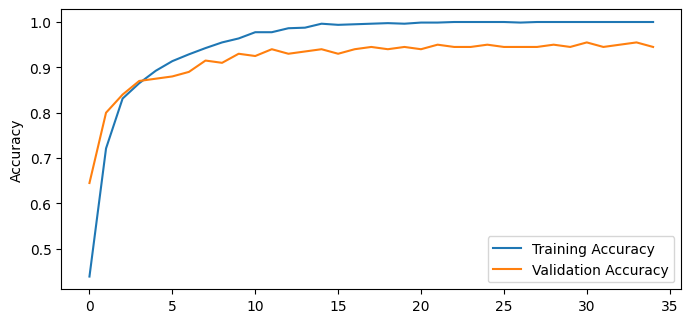

In [40]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')

In [41]:
model_uri = "../modelh5/model_RNN.h5"
model.save(model_uri)

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 0s 4ms/step


array([[45,  1,  0,  2,  0],
       [ 0, 29,  3,  1,  0],
       [ 0,  1, 37,  0,  0],
       [ 2,  1,  0, 41,  0],
       [ 0,  0,  0,  0, 37]])

In [43]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.91      0.88      0.89        33
           2       0.93      0.97      0.95        38
           3       0.93      0.93      0.93        44
           4       1.00      1.00      1.00        37

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



### Testing

In [44]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 101, 64)           4224      
                                                                 
 dense_4 (Dense)             (None, 101, 32)           2080      
                                                                 
 flatten_1 (Flatten)         (None, 3232)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                206912    
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 5)                 165       
                                                                 
Total params: 215461 (841.64 KB)
Trainable params: 215

In [45]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')

In [46]:
predict('../data/training/MVP/New_MVP_004.wav')

1/1 [==============================] - 0s 180ms/step
[0.00098006 0.00703418 0.00183999 0.9599066  0.03023924]
3
Predicted class: MVP
